## LINEAR REGRESSION USING GRADIENT DESCENT

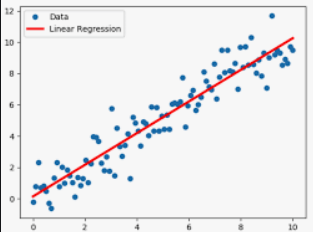



We want to predict the output i.e y_pred value which is close to the actual output y, for every datapoints.
We define error as difference between the y_pred and y actual and look to minimize the error. Since we focus on the magnitude of the difference, not the signs, we can take the absolute difference or squared difference.


                          absolute error:              error = |y_pred - y|    
                        squared error:               error = (y_pred - y)2                                     

In order to train a model, we define the cost function, which is the total error or sum of errors of all the datapoints in the training set.

 The goal for training a model is to minimize the cost function and obtain best values of the parameters at which the cost function is minimum.


###Def: Cost function is the total error for all the datapoints. Cost function is also called as Loss Function.

We can take Sum of Squared Errors (SSE) or Mean-Squared Errors (MSE) as cost function for a linear regression model.
Difference of actual and predicted y value, and taking square of that difference, summing up for the squared differences for all the row points. 


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc = {'figure.figsize':(15,8)})

In [72]:
######intialization#####################

#learning rate
lr=0.0001 
slope=0
yintercept=0                             

In [61]:
###########creating dataset##############
data=[]
for x in range(100):
  data.append((x,x))

df=pd.DataFrame(data, columns=['X','Y'])
print(df)

     X   Y
0    0   0
1    1   1
2    2   2
3    3   3
4    4   4
..  ..  ..
95  95  95
96  96  96
97  97  97
98  98  98
99  99  99

[100 rows x 2 columns]


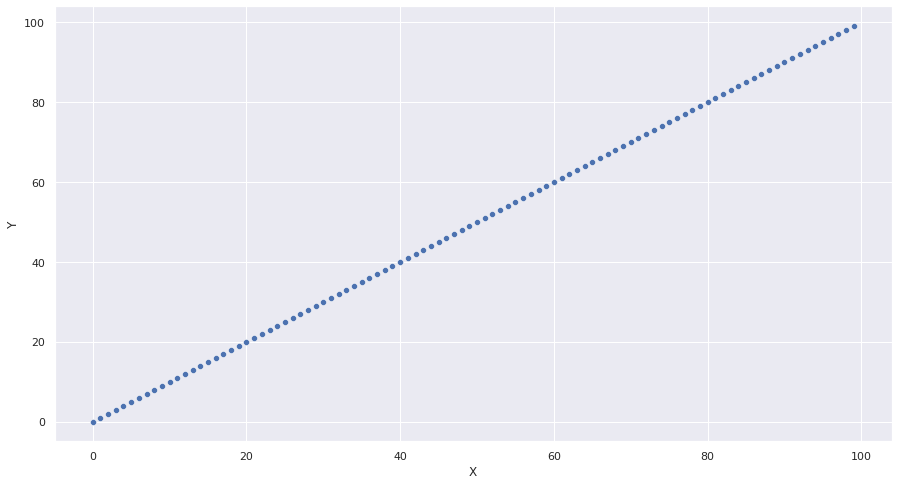

In [62]:
# visualing the linear relationship 
sns.scatterplot(data=df,x="X",y="Y")

###Gradients or Partial Derivative

### What is Gradient?
 Gradient tells by what proportion Y changes when X changes by a unit. it is calculated as ratio of change in Y to change in X. 
 Gradient is also referred as slope. 

Higher the gradient, steeper is the straight line. 

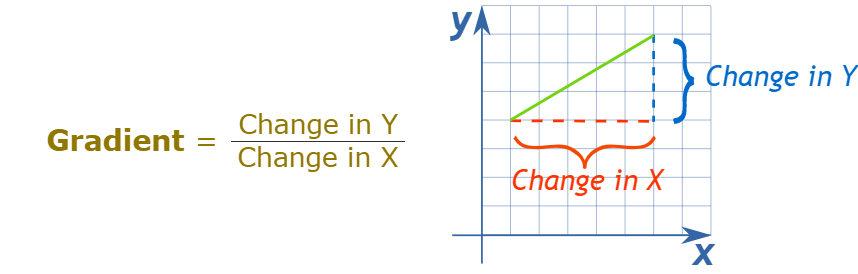



Partial Derivative or Gradient 

For a function having multiple variables, partial derivative of function is computed as derivative of function wrt to one of those variables, treating other variables as constant.

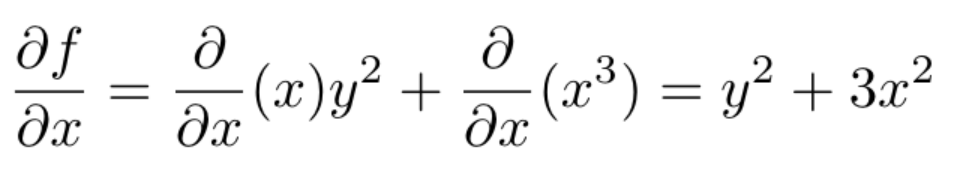


## Gradient computation for Slope and Intercept in linear equation 
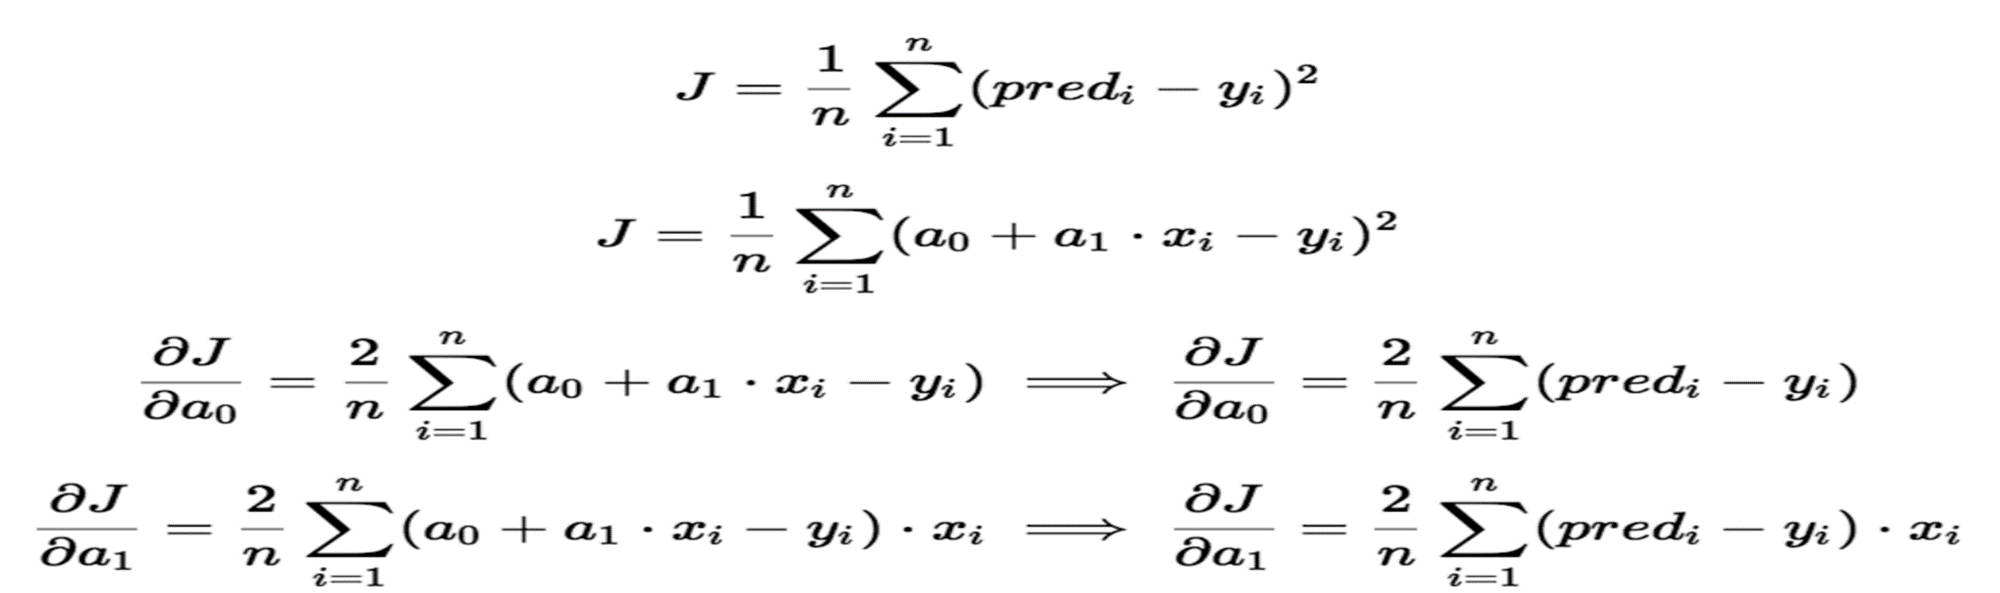






In [ ]:
data

In [64]:
def calculateCost(slope,yintercept, data):
  """ Computing cost for Linear model"""
  totalCost=0

  for x in data:
    y_pred=slope*x[0] + yintercept
    error=(y_pred - x[1])**2
    totalCost=totalCost + error
  
  totalCost=totalCost*(1/(len(data)))

  return totalCost

## Gradient descent update rule for slope and intercept
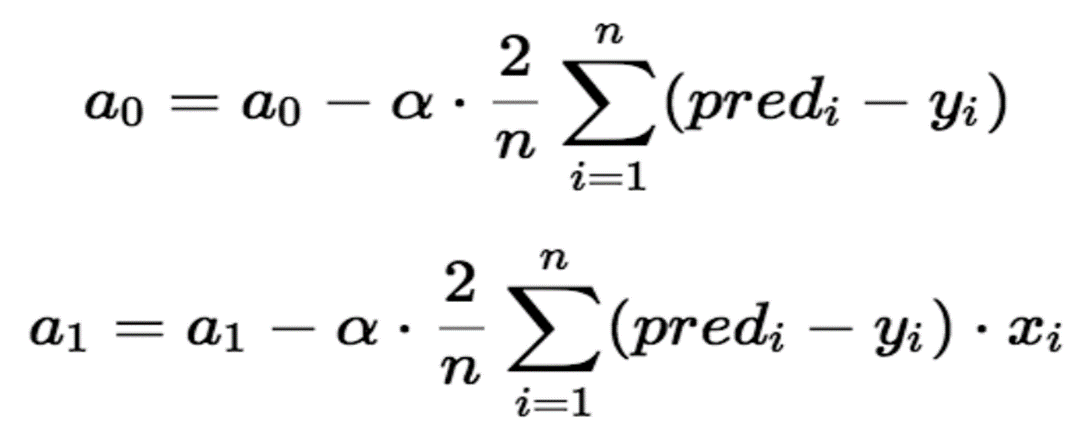


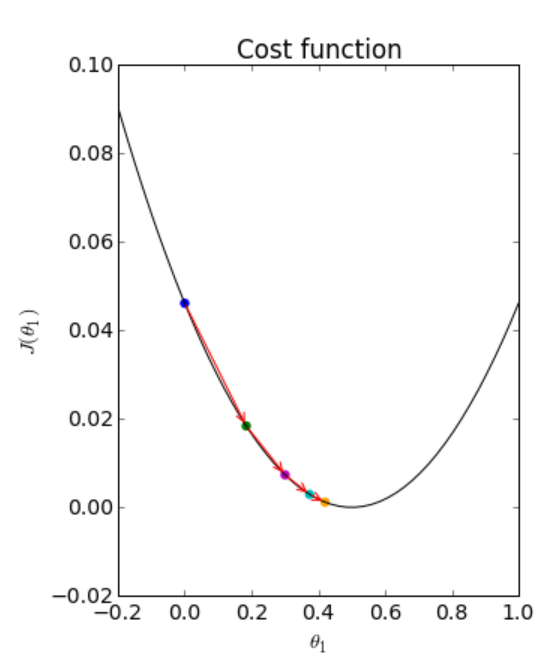



In [65]:
 # gradient descent update rule

def calculateSlope(slope, yintercept,lr,data):
  sum_grad=0
  for x in data:
    y_pred=slope*x[0] + yintercept
    slope_grad=(y_pred - x[1])*x[0]
    sum_grad=sum_grad + slope_grad
  slope=slope - lr*sum_grad*(2/len(data))        
  return slope

In [66]:
# gradient descent update rule

def calculateIntercept(slope, yintercept,lr,data):
  sum_grad=0
  for x in data:
    y_pred=slope*x[0] + yintercept
    intercept_grad=(y_pred - x[1])
    sum_grad=sum_grad + intercept_grad                      
  yintercept=yintercept - lr*sum_grad*(2/len(data))         

  return yintercept

In [70]:
# slope =0, yintercept=0
cost=calculateCost(slope,yintercept,data)
print("cost estimated:",cost)

cost estimated: 3283.5


In [68]:
# slope =1, yintercept=0

cost=calculateCost(slope,yintercept,data)
print("cost estimated:",cost)

cost estimated: 0.0


We need to tune(update) the parameters: slope and yintercept so that we attained minimum cost value.

For that we can iterate multiple times over the gradient descent update rule to update the parameters until we reach the point of minimum cost value(point of global minima)

In [ ]:
# iterating until reach the point of minima in the cost function
# fresh run with slope=0, yintercept=0

cost=calculateCost(slope,yintercept,data)
print(f"for intial value slope {slope} and intercept {yintercept} \n cost estimated : {cost} ")
prev_cost=cost + 0.01
while prev_cost > cost:
  slope=calculateSlope(slope, yintercept,lr,data)
  yintercept=calculateIntercept(slope, yintercept,lr,data)
  prev_cost=cost
  cost=calculateCost(slope,yintercept,data)
  print("---------------------")
  print(f"slope: {slope}")
  print(f"y-intercept: {yintercept}")
  print(f"cost: {cost}")

###Declaring Convergance for defining the condition to terminate the iteration

we say convergence is acheived when there is  no change or very very small change in the function ( i.e little change along the y-axis), it happens at the point where
curve is flattened out over the x-axis.  we can write the condition of change in cost function is near to zero.
It does not mean that it reaches to global point of minima, but we stop training when reached to convergance.

In [73]:
#Declaring convergance 
# fresh run with m , slope=0, yintercept(c)=0

cost=calculateCost(slope,yintercept,data)
print(f"for intial value slope {slope} and intercept {yintercept} cost estimated : {cost} ")
prev_cost=cost + 0.01
while prev_cost > cost  and abs(prev_cost - cost)>0.0001:
  #print(abs(prev_cost - cost) ,"covergance")
  slope=calculateSlope(slope, yintercept,lr,data)
  yintercept=calculateIntercept(slope, yintercept,lr,data)
  prev_cost=cost
  cost=calculateCost(slope,yintercept,data)
  #print(abs(prev_cost - cost) ,"new diff", f"new cost {cost} previous cost {prev_cost}")
  print("---------------------")
  print(f"slope: {slope}")
  print(f"y-intercept: {yintercept}")
  print(f"cost: {cost}")

for intial value slope 0 and intercept 0 cost estimated : 3283.5 
---------------------
slope: 0.6567000000000001
y-intercept: 0.0033986699999999956
cost: 386.8610332882686
---------------------
slope: 0.882111463167
y-intercept: 0.004565086780646695
cost: 45.57986318874999
---------------------
slope: 0.9594836709461028
y-intercept: 0.004965285420924149
cost: 5.370212998233283
---------------------
slope: 0.98604158791013
y-intercept: 0.005102480643529677
cost: 0.6327231747958365
---------------------
slope: 0.9951575625711767
y-intercept: 0.0051494002779463215
cost: 0.07455333613534118
---------------------
slope: 0.9982866121679334
y-intercept: 0.005165332937428192
cost: 0.008789872956005786
---------------------
slope: 0.999360657161171
y-intercept: 0.005170629364945114
cost: 0.00104162177568758
---------------------
slope: 0.999729324372717
y-intercept: 0.005172274927782227
cost: 0.00012871815743908003
---------------------
slope: 0.9998558715353687
y-intercept: 0.0051726673445965

The parameter values are very very close to actual but are not the actual values.

In [74]:
# capturing y-pred values based on attained optimum values for slope, intercept

def predict_y(slope,yintercept,data):
  """ function to predict y values"""
  predictedY=[]
  print(f" Best Slope:{slope} \n Best y-intercept: {yintercept}")
  for x in data:
    y_pred=slope*x[0] + yintercept
    predictedY.append(y_pred)

  df['predictedY']=predictedY

  return df

predict_y(slope,yintercept,data)

 Best Slope:0.9998993112913805 
 Best y-intercept: 0.0051726296293429334


,X,Y,predictedY
0,0,0,0.005173
1,1,1,1.005072
2,2,2,2.004971
3,3,3,3.004871
4,4,4,4.004770
...,...,...,...
95,95,95,94.995607
96,96,96,95.995507
97,97,97,96.995406
98,98,98,97.995305


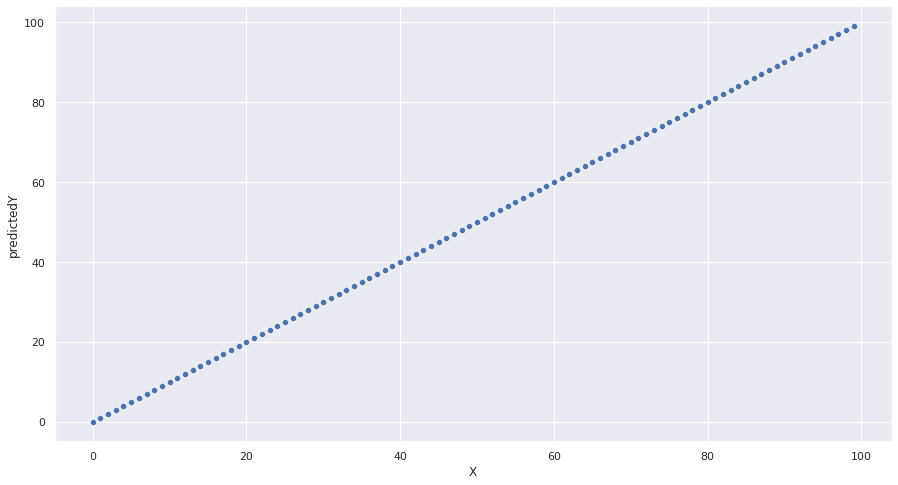

In [75]:
# visualizing the linear relationship between predicted points and input X
plot=sns.scatterplot(data=df,x="X",y="predictedY")